In [1]:
from __future__ import print_function
from keras import optimizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.datasets import imdb
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
import numpy as np
import os
import random
from numpy import argmax
import string
import matplotlib.pyplot as plt
import io

import time
from datetime import timedelta

Using MXNet backend.


In [2]:
base_dir = "code/"
text_size = 30000

In [3]:
alphabet = string.printable

char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# integer encode input data
def onehot_encoded_from_raw (data, char_to_int=char_to_int):
    integer_encoded = [char_to_int[char] for char in data]
    
    return onehot_encoded(integer_encoded, char_to_int)
    

# integer encode input data
def onehot_encoded (integer_encoded, char_to_int=char_to_int):
    # one hot encode
    onehot_encoded = list()
    for value in integer_encoded:
        letter = [0 for _ in range(len(char_to_int))]
        letter[value] = 1
        onehot_encoded.append(letter)
    
    return onehot_encoded

In [4]:
def add_left_padding (reviews_ints, seq_len = 30000):
    features = np.zeros((len(reviews_ints), seq_len), dtype=float)
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_len]
    return features

def load_data(train_porcentage):
    
    labels = []
    data_list = []

    files = os.listdir(base_dir)
    
    result = -1
    
    for i in range(len(files)):
        file_path = base_dir + files[i]
        f = io.open(file_path, mode="r", encoding="utf-8")
        file = f.read()
        try:
            integer_encoded = [char_to_int[char]/len(alphabet) for char in file]
            if (len(integer_encoded) >= text_size):
                pass
            #print(file_path)
            
            commented = files[i].split('.')[0].split('-')[1]=='true'
            result_tmp = 1 if commented else 0
            if result_tmp != result:
                result = result_tmp
                labels.append(result_tmp)
                data_list.append(integer_encoded)
                
        except:
            pass


    labels = np.asarray(onehot_encoded_from_raw(labels, [0,1]), dtype="int32")
    
    data = add_left_padding(data_list, text_size)
    
    tol_num = len(labels)
    
    train_num = int(tol_num*train_porcentage)
    
    rr = [i for i in range(tol_num)] 
    random.shuffle(rr)
    x_train = data[rr][:train_num]
    y_train = labels[rr][:train_num]
    x_test = data[rr][train_num:]
    y_test = labels[rr][train_num:]
    
    x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
    x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

    return (x_train,y_train),(x_test,y_test)

In [5]:
(x_train,y_train),(x_test,y_test) = load_data (0.8)

In [6]:
len(x_train)

473

In [7]:
x_test[1]

array([[ 0.  ,  0.  ,  0.  , ...,  0.92,  0.94,  0.92]])

In [8]:
y_test[1]

array([1, 0], dtype=int32)

In [9]:

model = Sequential()
model.add(LSTM(2000, activation='sigmoid', return_sequences=False, input_shape=(1, text_size)))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

#model.add(Activation('sigmoid'))

model.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs
#mean_squared_error
#binary_crossentropy
#model.compile(loss='mean_squared_error',
#              optimizer='adadelta',
#              metrics=['acc'])

#categorical_crossentropy

#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])


model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['acc'])
model.summary()
print('model built')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 2000)          256008000   lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1000)          2001000     lstm_1[0][0]                     
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 1000)          0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 500)           500500      dropout_1[0][0]                  
___________________________________________________________________________________________

In [10]:
batch_size = 8
epochs = 50

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

print('Train...')
start_time = time.monotonic()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          nb_epoch=epochs,
          validation_data=(x_test, y_test), callbacks=callbacks_list, verbose=0)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

Train...


/home/admin2/anaconda3/lib/python3.6/site-packages/mxnet/module/bucketing_module.py:385: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.125). Is this intended?
  force_init=force_init)


Epoch 00000: val_acc improved from -inf to 0.50420, saving model to weights.best.hdf5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc improved from 0.50420 to 0.52101, saving model to weights.best.hdf5
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc improved from 0.52101 to 0.52101, saving model to weights.best.hdf5
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc improved from 0.52101 to 0.59664, saving model to weights.best.hdf5
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc improved from 0.59664 to 0.62185, saving model to weights.best.hdf5
Epoch 00019: val_acc did not improve
Epo

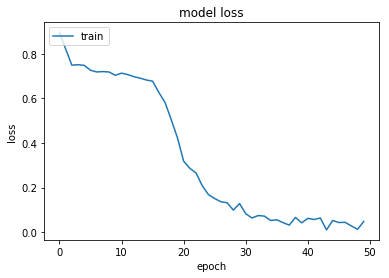

In [11]:
plt.clf()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

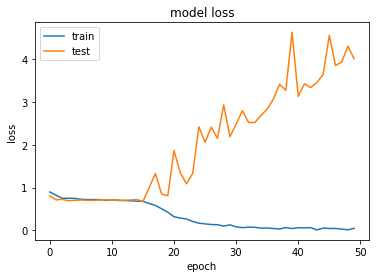

In [12]:
plt.clf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


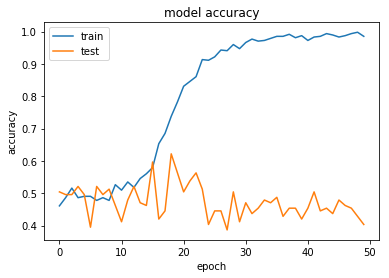

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])